## MNIST 데이터 학습

In [2]:
import tensorflow as tf

# 1. MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0

# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 훈련
model.fit(x_train, y_train, epochs=15)

# 6. 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

Epoch 1/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1983 - accuracy: 0.9418
Epoch 2/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0792 - accuracy: 0.9761
Epoch 3/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0526 - accuracy: 0.9835
Epoch 4/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0355 - accuracy: 0.9888
Epoch 5/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0277 - accuracy: 0.9911
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0216 - accuracy: 0.9930
Epoch 7/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0167 - accuracy: 0.9944
Epoch 8/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0133 - accuracy: 0.9958
Epoch 9/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0117 - accuracy: 0.9959
Epoch 10/15
1875/1875 [==============================] - 12s 6ms/step - l

## fashion-MNIST 학습

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4968 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3744 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3365 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3106 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2942 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2794 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2685 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2586 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2473 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.23

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3483 - accuracy: 0.8753 - 554ms/epoch - 2ms/step

Test accuracy: 0.8752999901771545


In [1]:
import zipfile
import os

# 압축 해제할 파일 경로
zip_path = '/content/shapes.zip'

# 압축 해제될 디렉토리 경로 (변경 가능)
extract_path = '/content/shapes'

# 디렉토리 생성 (없을 경우)
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# 압축 해제
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print('압축 해제 완료')


압축 해제 완료


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 데이터 생성기 인스턴스화
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/shapes/shapes',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    '/content/shapes/shapes',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    subset='validation')


Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [14]:
model = Sequential([
    Flatten(input_shape=(28, 28, 3)),  # 3 채널 이미지를 위한 입력 형태 조정
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 클래스가 3개이므로 뉴런 수를 3으로 설정
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # 다중 분류를 위한 손실 함수 변경
              metrics=['accuracy'])


In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10)


Epoch 1/10
7/7 [==============================] - 1s 53ms/step - loss: 5.5738 - accuracy: 0.2692 - val_loss: 1.6805 - val_accuracy: 0.3125
Epoch 2/10
7/7 [==============================] - 0s 23ms/step - loss: 1.3090 - accuracy: 0.3510 - val_loss: 1.5057 - val_accuracy: 0.3125
Epoch 3/10
7/7 [==============================] - 0s 24ms/step - loss: 1.3360 - accuracy: 0.2692 - val_loss: 1.3999 - val_accuracy: 0.2188
Epoch 4/10
7/7 [==============================] - 0s 28ms/step - loss: 1.1436 - accuracy: 0.3365 - val_loss: 1.0994 - val_accuracy: 0.3125
Epoch 5/10
7/7 [==============================] - 0s 24ms/step - loss: 1.0994 - accuracy: 0.3077 - val_loss: 1.0987 - val_accuracy: 0.3125
Epoch 6/10
7/7 [==============================] - 0s 23ms/step - loss: 1.0986 - accuracy: 0.3438 - val_loss: 1.0989 - val_accuracy: 0.3125
Epoch 7/10
7/7 [==============================] - 0s 22ms/step - loss: 1.0987 - accuracy: 0.3269 - val_loss: 1.0990 - val_accuracy: 0.2812
Epoch 8/10
7/7 [===========

In [18]:
# 검증 데이터셋에 대한 모델 평가
val_loss, val_acc = model.evaluate(validation_generator)
print('Validation accuracy:', val_acc)


2/2 [==============================] - 0s 15ms/step - loss: 1.0986 - accuracy: 0.3333
Validation accuracy: 0.3333333432674408


## shapes attempt2

In [12]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# 데이터 로드 및 전처리
data_dir = '/content/shapes/shapes'
batch_size = 32
img_height = 180
img_width = 180

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

model = Sequential([
    # 첫 번째 컨볼루션 블록
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    # 두 번째 컨볼루션 블록
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # 세 번째 컨볼루션 블록
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # 네 번째 컨볼루션 블록
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # Flatten 및 완전 연결 레이어
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련 및 평가
history = model.fit(train_generator, epochs=100, batch_size=16, validation_data=validation_generator)

# 모델 저장 (선택적)
model.save('shapes_model_deeper.h5')



Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/100
8/8 [==============================] - 3s 126ms/step - loss: 1.6413 - accuracy: 0.3375 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 2/100
8/8 [==============================] - 1s 66ms/step - loss: 1.1023 - accuracy: 0.3250 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 3/100
8/8 [==============================] - 0s 57ms/step - loss: 1.1013 - accuracy: 0.2958 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/100
8/8 [==============================] - 0s 57ms/step - loss: 1.0987 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/100
8/8 [==============================] - 0s 58ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/100
8/8 [==============================] - 1s 69ms/step - loss: 1.0989 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/100
8/8 [==============================] - 0s 57ms/step - loss: 1.0987

KeyboardInterrupt: ignored

In [13]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# 데이터 로드 및 전처리
data_dir = '/content/shapes/shapes'
batch_size = 32
img_height = 180
img_width = 180

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

model = Sequential([
    # 첫 번째 컨볼루션 블록
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    # 두 번째 컨볼루션 블록
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # 세 번째 컨볼루션 블록
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # 네 번째 컨볼루션 블록
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # Flatten 및 완전 연결 레이어
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련 및 평가
history = model.fit(train_generator, epochs=100, batch_size=32, validation_data=validation_generator)

# 모델 저장 (선택적)
model.save('shapes_model_deeper.h5')



Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/100
8/8 [==============================] - 3s 109ms/step - loss: 1.6146 - accuracy: 0.3125 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/100
8/8 [==============================] - 0s 64ms/step - loss: 1.1047 - accuracy: 0.3333 - val_loss: 1.0983 - val_accuracy: 0.3333
Epoch 3/100
8/8 [==============================] - 1s 58ms/step - loss: 1.0999 - accuracy: 0.3250 - val_loss: 1.0978 - val_accuracy: 0.3333
Epoch 4/100
8/8 [==============================] - 1s 61ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0979 - val_accuracy: 0.3333
Epoch 5/100
8/8 [==============================] - 0s 59ms/step - loss: 1.0981 - accuracy: 0.3250 - val_loss: 1.0949 - val_accuracy: 0.4833
Epoch 6/100
8/8 [==============================] - 1s 61ms/step - loss: 1.0935 - accuracy: 0.4000 - val_loss: 1.0797 - val_accuracy: 0.4333
Epoch 7/100
8/8 [==============================] - 0s 59ms/step - loss: 1.0636

In [14]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# 데이터 로드 및 전처리
data_dir = '/content/shapes/shapes'
batch_size = 32
img_height = 180
img_width = 180

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

model = Sequential([
    # 첫 번째 컨볼루션 블록
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    # 두 번째 컨볼루션 블록
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # 세 번째 컨볼루션 블록
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # 네 번째 컨볼루션 블록
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # 네 번째 컨볼루션 블록
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten 및 완전 연결 레이어
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련 및 평가
history = model.fit(train_generator, epochs=50, batch_size=32, validation_data=validation_generator)

# 모델 저장 (선택적)
model.save('shapes_model_deeper.h5')



Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/50
8/8 [==============================] - 3s 130ms/step - loss: 1.2836 - accuracy: 0.3125 - val_loss: 1.0994 - val_accuracy: 0.3333
Epoch 2/50
8/8 [==============================] - 1s 61ms/step - loss: 1.1027 - accuracy: 0.3000 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 3/50
8/8 [==============================] - 1s 60ms/step - loss: 1.1002 - accuracy: 0.3333 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 4/50
8/8 [==============================] - 1s 62ms/step - loss: 1.0988 - accuracy: 0.2750 - val_loss: 1.0985 - val_accuracy: 0.3333
Epoch 5/50
8/8 [==============================] - 1s 61ms/step - loss: 1.1003 - accuracy: 0.3458 - val_loss: 1.0984 - val_accuracy: 0.3333
Epoch 6/50
8/8 [==============================] - 1s 61ms/step - loss: 1.0990 - accuracy: 0.2917 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/50
8/8 [==============================] - 1s 75ms/step - loss: 1.0991 - accu

In [25]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# 데이터 로드 및 전처리
data_dir = '/content/shapes/shapes'
batch_size = 32
img_height = 180
img_width = 180

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

model = Sequential([
    # 첫 번째 컨볼루션 블록
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    # 두 번째 컨볼루션 블록
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # 세 번째 컨볼루션 블록
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # 네 번째 컨볼루션 블록
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # 다섯 번째 컨볼루션 블록
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # 여섯 번째 컨볼루션 블록
    Conv2D(1024, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # Flatten 및 완전 연결 레이어
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련 및 평가
history = model.fit(train_generator, epochs=50, batch_size=32, validation_data=validation_generator)

# 모델 저장 (선택적)
model.save('shapes_model_deeper_and_wider.h5')


Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


ValueError: ignored

In [26]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# 데이터 로드 및 전처리
data_dir = '/content/shapes/shapes'
batch_size = 32
img_height = 180
img_width = 180

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

model = Sequential([
    # 첫 번째 컨볼루션 블록
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    # 두 번째 컨볼루션 블록
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # 세 번째 컨볼루션 블록
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # 네 번째 컨볼루션 블록
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # 네 번째 컨볼루션 블록
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten 및 완전 연결 레이어
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련 및 평가
history = model.fit(train_generator, epochs=50, batch_size=48, validation_data=validation_generator)

# 모델 저장 (선택적)
model.save('shapes_model_deeper.h5')

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/50
8/8 [==============================] - 3s 97ms/step - loss: 1.4785 - accuracy: 0.2792 - val_loss: 1.0981 - val_accuracy: 0.3333
Epoch 2/50
8/8 [==============================] - 1s 75ms/step - loss: 1.1017 - accuracy: 0.3292 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/50
8/8 [==============================] - 1s 83ms/step - loss: 1.0990 - accuracy: 0.3333 - val_loss: 1.0985 - val_accuracy: 0.3333
Epoch 4/50
8/8 [==============================] - 1s 73ms/step - loss: 1.0990 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/50
8/8 [==============================] - 1s 80ms/step - loss: 1.0988 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/50
8/8 [==============================] - 1s 61ms/step - loss: 1.0989 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/50
8/8 [==============================] - 1s 62ms/step - loss: 1.0986 - accur

[0.27916666865348816,
 0.3291666805744171,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.34166666865348816,
 0.3958333432674408,
 0.44999998807907104,
 0.5416666865348816,
 0.6416666507720947,
 0.7291666865348816,
 0.8458333611488342,
 0.8999999761581421,
 0.9125000238418579,
 0.9291666746139526,
 0.9458333253860474,
 0.9666666388511658,
 0.9750000238418579,
 0.9958333373069763,
 0.9958333373069763,
 0.9958333373069763,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

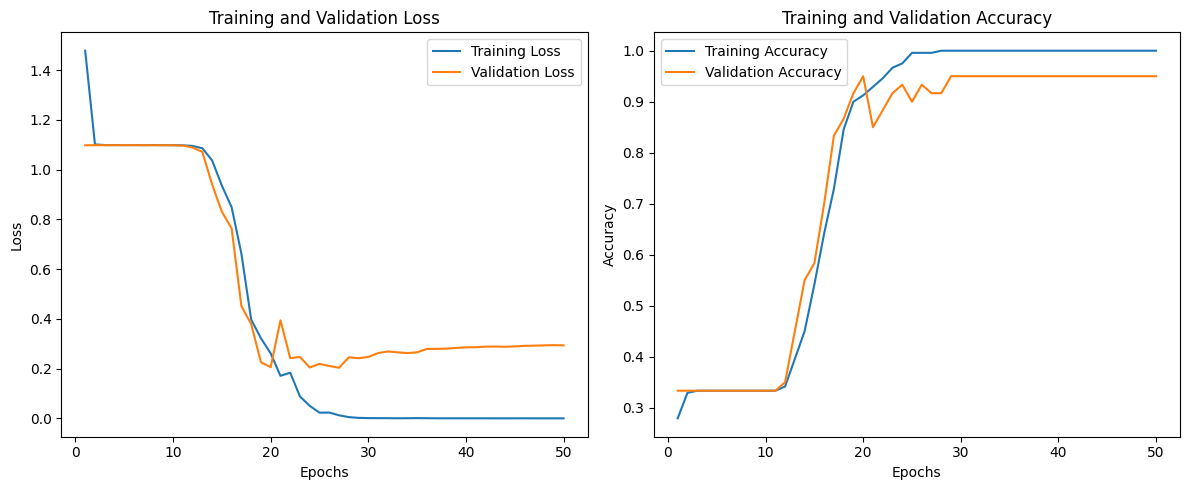

In [31]:
import matplotlib.pyplot as plt

# 가상의 훈련 및 검증 데이터
# 실제 사용할 때는 'history' 객체에서 데이터를 가져와야 함
# 예시를 위해 무작위 데이터를 생성
epochs = range(1, 51)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 손실 그래프
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
